In [ ]:
# Import necessary libraries
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from zipfile import ZipFile
from fastai.vision import * 
from fastai.vision import *
from fastai.metrics import error_rate
import matplotlib.pyplot as plt
# constants
path_img = 'images/data'
## Not used later
from PIL import Image

In [2]:
#Once
with ZipFile('images/data_2.zip', 'r') as zip: 
    zip.extractall('images')

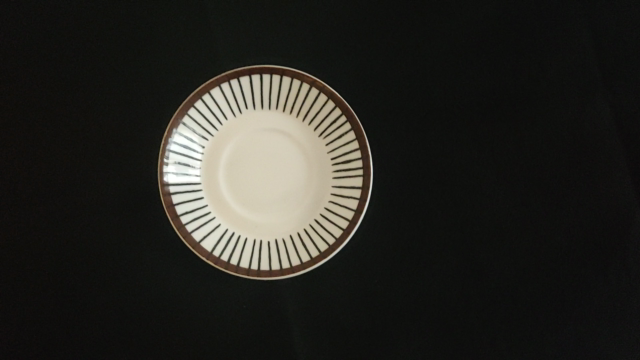

In [3]:
#Image.open(path_img+'/valid/tallrik_1/1586527524387-0001.png')

In [4]:
im = Image.open(path_img+'/valid/tallrik_1/1586527524387-0001.png')
print('width: %d - height: %d' % im.size) # returns (width, height) tuple

width: 640 - height: 360


In [5]:
fnames = get_image_files(path_img+'/valid/tallrik_1/')
fnames[:5]

[PosixPath('images/data/valid/tallrik_1/1586527524387-0013.png'),
 PosixPath('images/data/valid/tallrik_1/1586527524387-0015.png'),
 PosixPath('images/data/valid/tallrik_1/1586527524387-0005.png'),
 PosixPath('images/data/valid/tallrik_1/1586527524387-0003.png'),
 PosixPath('images/data/valid/tallrik_1/1586527524387-0010.png')]

In [ ]:
#data = ImageDataBunch.from_folder(path_img, ds_tfms=get_transforms(), size=360, bs=8).normalize(imagenet_stats)
data = ImageDataBunch.from_folder(path_img, size=360, bs=8).normalize(imagenet_stats)
#data = ImageDataBunch.from_folder(path_img, size=360, bs=8)
data.show_batch(rows=3, figsize=(7,6))

In [12]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


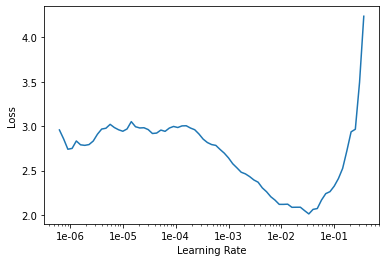

In [13]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit(64,1e-6)
learn.recorder.plot_losses() 

In [9]:
learn.save('stage-1-50')

NameError: name 'learn' is not defined

In [8]:
print(data.classes)
len(data.classes),data.c

['tallrik_1', 'tallrik_2', 'tallrik_3', 'tallrik_4', 'tallrik_5', 'tallrik_6']


(6, 6)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


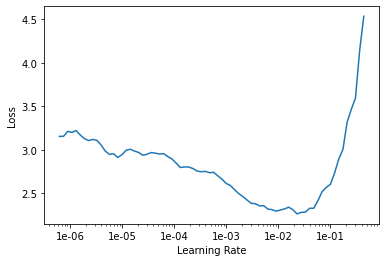

In [51]:
#learn.lr_find()
#learn.recorder.plot()

In [55]:
# learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,error_rate,time
0,0.295494,0.083371,0.031250,00:05
1,0.387203,0.236546,0.093750,00:05
2,0.986403,4.119166,0.562500,00:05
3,1.120927,1.403216,0.343750,00:05
4,1.200906,0.548890,0.187500,00:05
5,1.025628,1.127393,0.322917,00:05
6,1.062199,0.855106,0.239583,00:05
7,0.925969,1.611590,0.343750,00:05
8,0.776636,0.593274,0.250000,00:05
9,0.754823,0.139648,0.062500,00:05


In [57]:
learn.save('stage-1-50')

In [58]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.141880,0.008249,0.000000,00:05
1,0.128275,0.004013,0.000000,00:05
2,0.120447,0.005649,0.000000,00:05


In [60]:
learn.load('stage-1-50');

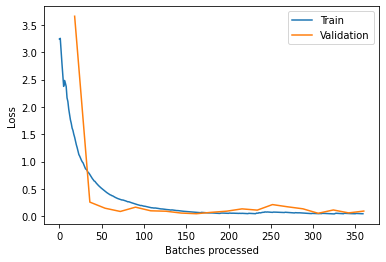

In [18]:
learn.recorder.plot_losses() 

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('tallrik_6', 'tallrik_5', 2)]

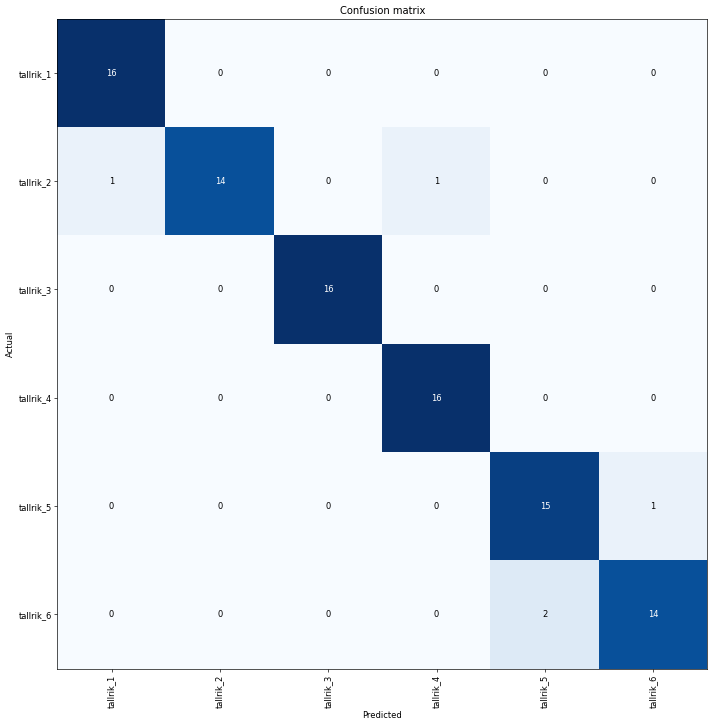

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)